<a href="https://colab.research.google.com/github/redagavin/IMM-Project/blob/main/IMMproject_Gavin_Yang.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import packages
import numpy as np
import matplotlib.pyplot as plt

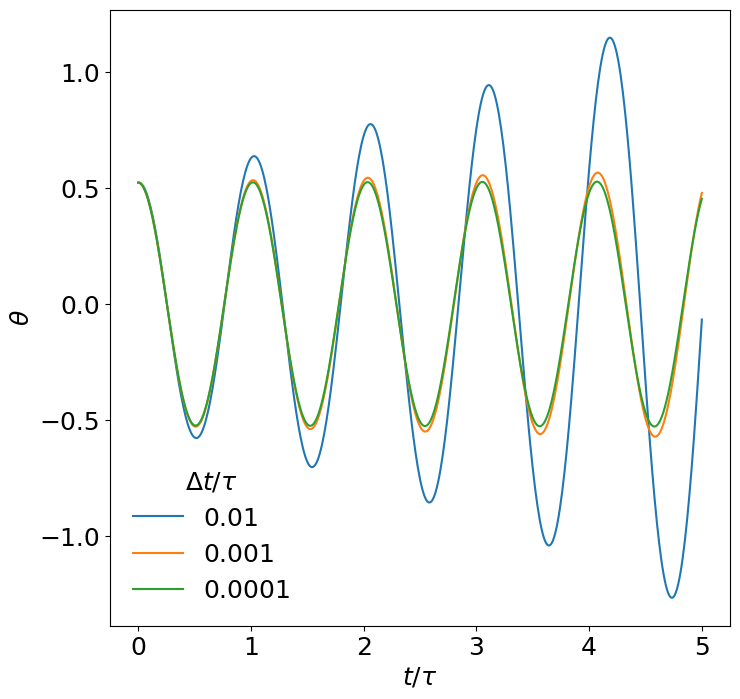

In [2]:
plt.rcParams.update({'font.size': 18})

# code for Figure 1
# setting up parameters
g = 9.8 # gravitational force(m/s^2)
l = 0.5 # length of the rod(m)
T = 2 * np.pi * np.sqrt(l/g) # the oscillation period(s)
dt_arr = np.array([0.01, 0.001, 0.0001]) #different delta t/tau
tf = 5 * T # simulation duration(s)
theta0 = np.pi/6 # the initial angle
y0 = 0 # the intial dtheta/dt(/s)

# set up the figure and x,y labels
plt.figure(figsize=(8,8))
plt.ylabel(r"$\theta$")
plt.xlabel(r"$t/\tau$")
lines = [];

# for different delta t/tau, run Euler method
for j in range(len(dt_arr)):
  dt = dt_arr[j] * T
  tM = int(np.floor(tf/dt)+1)
  t = np.linspace(0, tf, tM)
  dt = t[1]-t[0]
  theta = np.zeros(tM)
  y = np.zeros(tM)
  theta[0] = theta0
  y[0] = y0

  # Euler method
  for i in range(tM-1):
    dtheta = dt * y[i]
    dy = dt * (-(g/l)*np.sin(theta[i]))
    y[i+1] = y[i] + dy
    theta[i+1] = theta[i] + dtheta
  
  # plot the line
  lines += plt.plot(t/T, theta, label="$" + str(dt_arr[j]) + "$")

# set up the legend, save the figure, and display the figure
labels = [l.get_label() for l in lines]
plt.legend(lines, labels, frameon=False, title=r"$\Delta t/ \tau$")
plt.savefig("figure1.png", bbox_inches='tight')
plt.show()


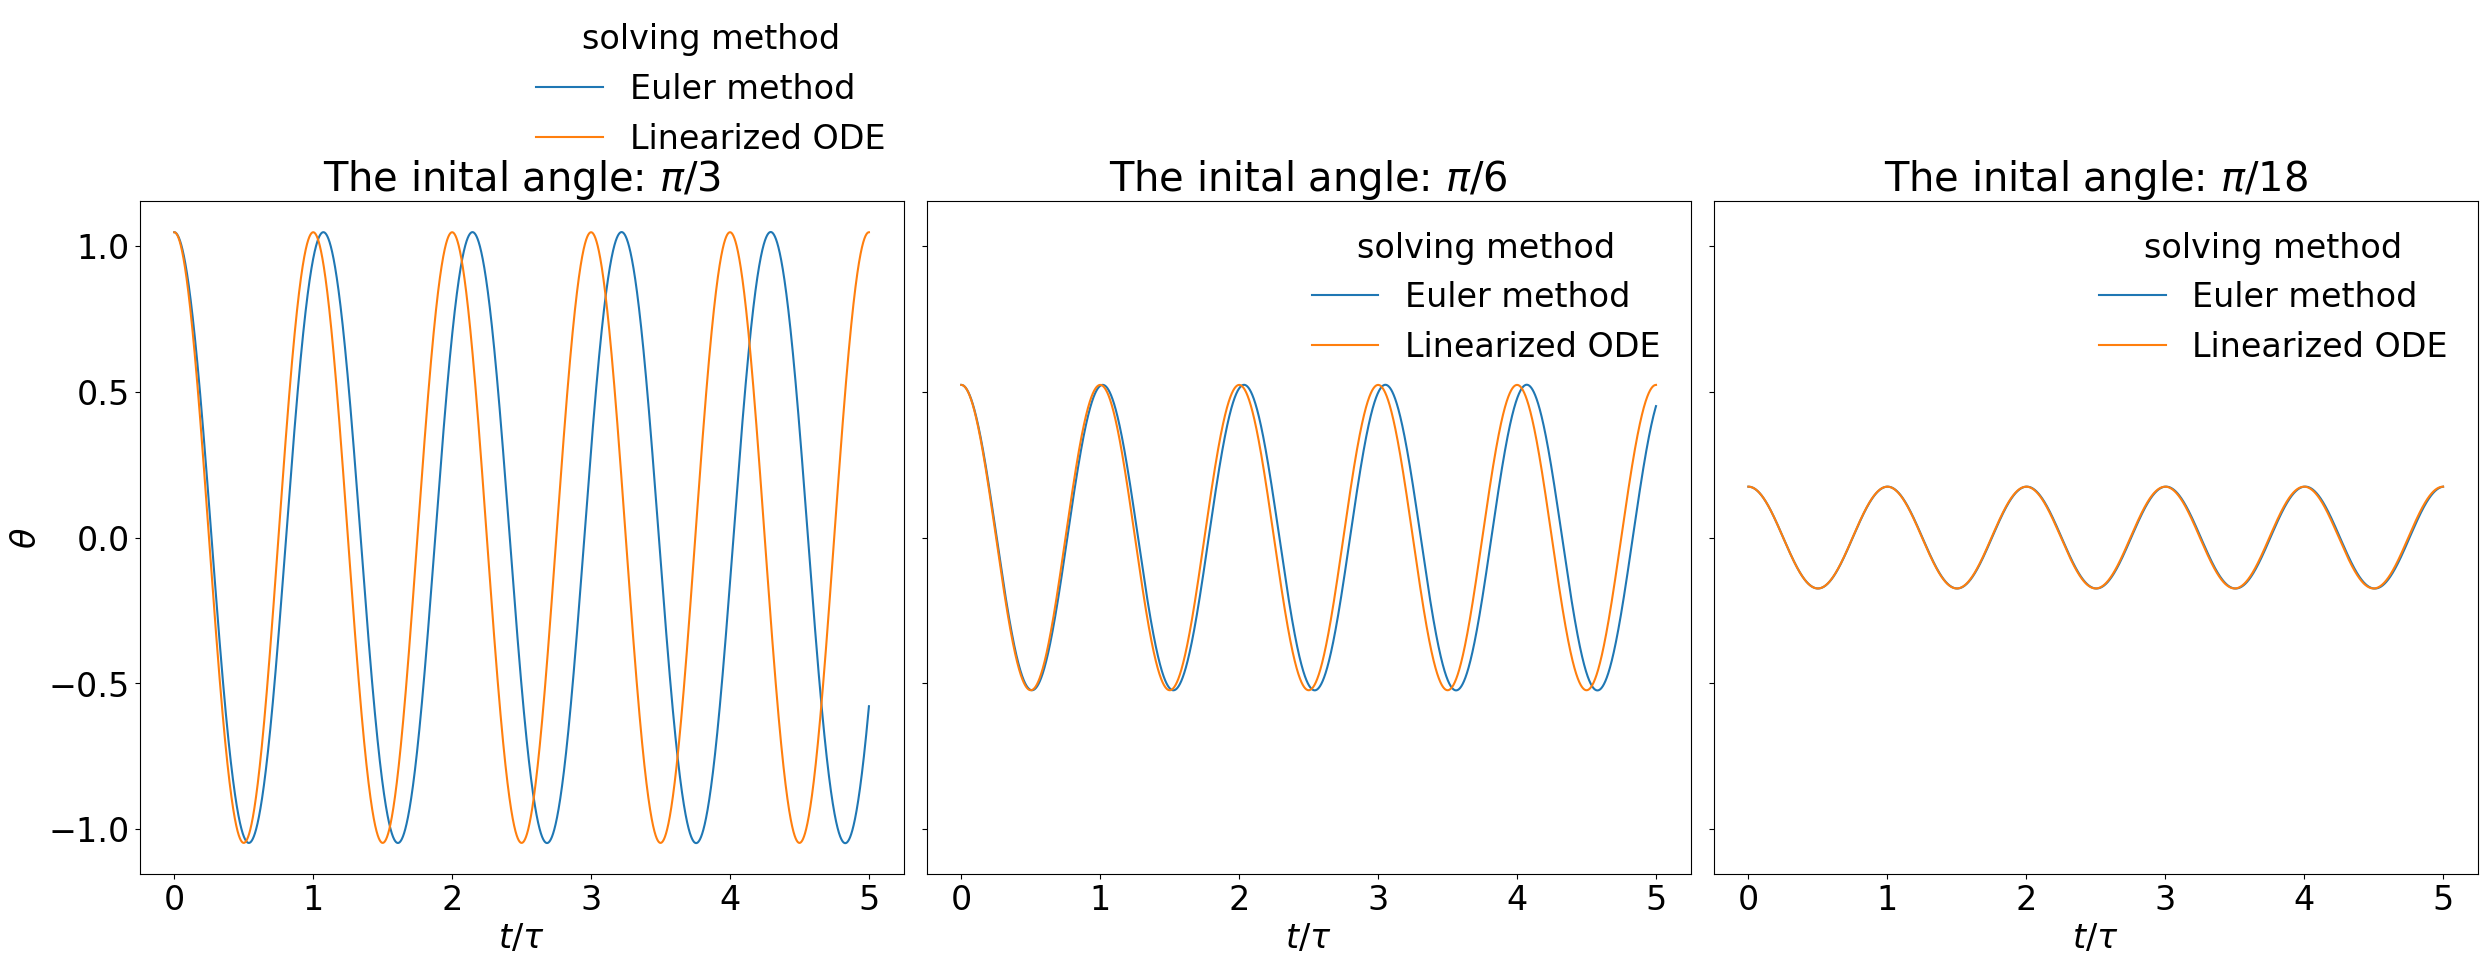

In [3]:
# code for Figure 2
plt.rcParams.update({'font.size': 24})

# setting up parameters
g = 9.8 # gravitational force(m/s^2)
l = 0.5 # length of the rod(m)
T = 2 * np.pi * np.sqrt(l/g) # the oscillation period(s)
dt = 0.00001 #a really small delta delta t/tau
tf = 5 * T # simulation duration(s)
theta0_arr = np.array([np.pi/3, np.pi/6, np.pi/18]) # different initial angles
y0 = 0 # the intial dtheta/dt(/s)

# set up the figure and x,y labels
fig, axes = plt.subplots(1, 3, sharey="all", figsize=(25,8))
fig.tight_layout()
fig.subplots_adjust(wspace=0.03)

# for different initial angles, run the Euler method and linear solution
for i in range(len(theta0_arr)):
  lines = []
  tM = int(np.floor(tf/(dt * T))+1)
  t = np.linspace(0, tf, tM)
  dt = t[1]-t[0]
  theta = np.zeros(tM)
  y = np.zeros(tM)
  theta[0] = theta0_arr[i]
  y[0] = y0

  # Euler method
  for j in range(tM-1):
    dtheta = dt * y[j]
    dy = dt * (-(g/l)*np.sin(theta[j]))
    y[j+1] = y[j] + dy
    theta[j+1] = theta[j] + dtheta
  
  # linear solution
  linear_theta = theta0_arr[i] * (np.cos(np.sqrt(g/l)*t))

  # plot the simulation and the solution
  lines += axes[i].plot(t/T, theta, label="Euler method")
  lines += axes[i].plot(t/T, linear_theta, label="Linearized ODE")

  # set up the label and the legend
  axes[i].set_xlabel(r"$t/\tau$")
  labels = [l.get_label() for l in lines]
  if i == 0:
    axes[i].legend(lines, labels, frameon=False, title="solving method", bbox_to_anchor=(1.015, 1.31))
  else:
    axes[i].legend(lines, labels, frameon=False, title="solving method")
  axes[i].set_title("The inital angle: $\pi$/" + str(int(np.pi/theta0_arr[i])))

# set up the label, save the figure, and display the figure
axes[0].set_ylabel(r"$\theta$")
plt.savefig("figure2.png", bbox_inches='tight')
plt.show()

<ipython-input-4-13a8b6a609e2>:48: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig("figure3.png", bbox_inches = "tight")
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


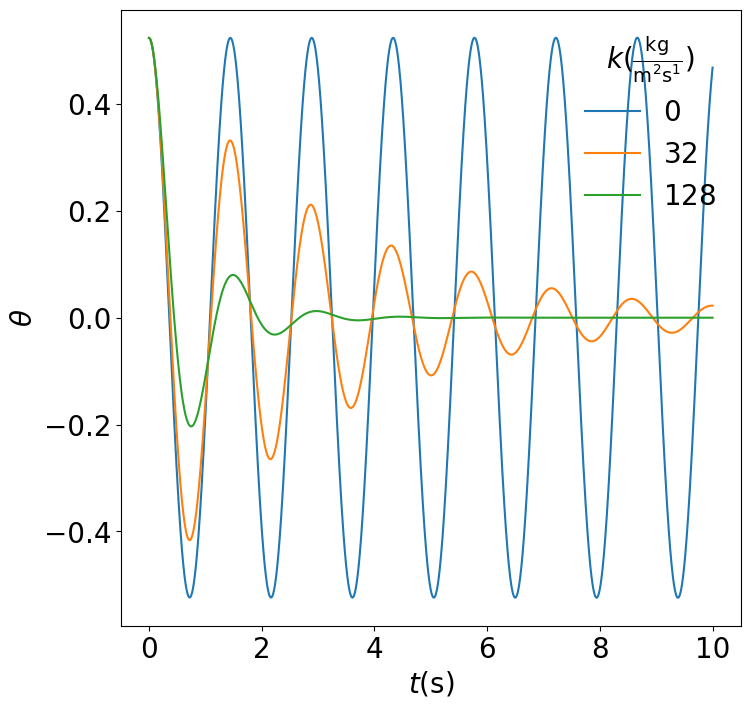

In [4]:
# code for Figure 3
plt.rcParams.update({'font.size': 20})

# setting up parameters
g = 9.8 # gravitational force(m/s^2)
l = 0.5 # length of the rod(m)
k_arr = np.array([0, 32, 128]) # the drag force constant k(dimensionless)
r = 0.025 # the radius of the sphere (m)
A = np.pi * (r * r) # the projected area (m^2)
m = 0.1 # the mass of the sphere (kg)
gamma_arr = (k_arr * A) / m # (m^2/kg)
beta = g / l
# T = 2 * np.pi / np.sqrt(beta - (gamma ** 2)/4) # the oscillation period(s)
dt = 0.00001 #a really small delta t(s)
tf = 10 # simulation duration(s)
theta0 = np.pi/6 # different initial angles
y0 = 0 # the intial dtheta/dt(/s)

# set up the figure and x,y labels
plt.figure(figsize=(8,8))
plt.ylabel(r"$\theta$")
plt.xlabel(r"$t(\mathrm{s})$")
lines = [];

# for different k, run the Euler method
for j in range(len(gamma_arr)):
  tM = int(np.floor(tf/dt)+1)
  t = np.linspace(0, tf, tM)
  dt = t[1]-t[0]
  theta = np.zeros(tM)
  y = np.zeros(tM)
  theta[0] = theta0
  y[0] = y0

  # the Euler method
  for i in range(tM-1):
    dtheta = dt * y[i]
    dy = dt * (-beta * np.sin(theta[i]) - gamma_arr[j] * y[i])
    y[i+1] = y[i] + dy
    theta[i+1] = theta[i] + dtheta
  
  # plot the line
  lines += plt.plot(t, theta, label="$" + str(k_arr[j]) + "$")

# set up the legend, save the figure, and display the figure
labels = [l.get_label() for l in lines]
plt.legend(lines, labels, frameon=False, title=r"$k(\frac{\mathrm{kg}}{\mathrm{m^2s^1}})$")
plt.savefig("figure3.png", bbox_inches = "tight")
plt.show()

<ipython-input-5-cda3776ec66c>:48: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig("figure4.png", bbox_inches = "tight")


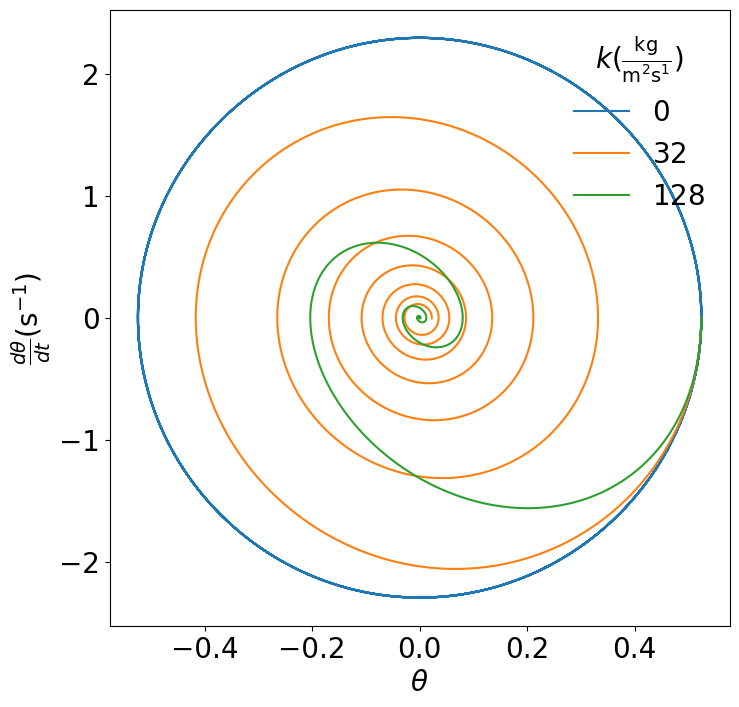

In [5]:
# code for Figure 4
plt.rcParams.update({'font.size': 20})

# setting up parameters
g = 9.8 # gravitational force(m/s^2)
l = 0.5 # length of the rod(m)
k_arr = np.array([0, 32, 128]) # the drag force constant k(dimensionless)
r = 0.025 # the radius of the sphere (m)
A = np.pi * (r * r) # the projected area (m^2)
m = 0.1 # the mass of the sphere (kg)
gamma_arr = (k_arr * A) / m # (m^2/kg)
beta = g / l
# T = 2 * np.pi / np.sqrt(beta - (gamma ** 2)/4) # the oscillation period(s)
dt = 0.00001 #a really small delta t(s)
tf = 10 # simulation duration(s)
theta0 = np.pi/6 # different initial angles
y0 = 0 # the intial dtheta/dt(/s)

# set up the figure and x,y labels
plt.figure(figsize=(8,8))
plt.ylabel(r"$\frac{d\theta}{dt}(\mathrm{s}^{-1})$")
plt.xlabel(r"$\theta$")
lines = [];

# for different k, run the Euler method
for j in range(len(gamma_arr)):
  tM = int(np.floor(tf/dt)+1)
  t = np.linspace(0, tf, tM)
  dt = t[1]-t[0]
  theta = np.zeros(tM)
  y = np.zeros(tM)
  theta[0] = theta0
  y[0] = y0

  # Euler method
  for i in range(tM-1):
    dtheta = dt * y[i]
    dy = dt * (-beta * np.sin(theta[i]) - gamma_arr[j] * y[i])
    y[i+1] = y[i] + dy
    theta[i+1] = theta[i] + dtheta
  
  # plot the line
  lines += plt.plot(theta, y, label="$" + str(k_arr[j]) + "$")

# set up the legend, save the figure, and display the figure
labels = [l.get_label() for l in lines]
plt.legend(lines, labels, frameon=False, title=r"$k(\frac{\mathrm{kg}}{\mathrm{m^2s^1}})$")
plt.savefig("figure4.png", bbox_inches = "tight")
plt.show()

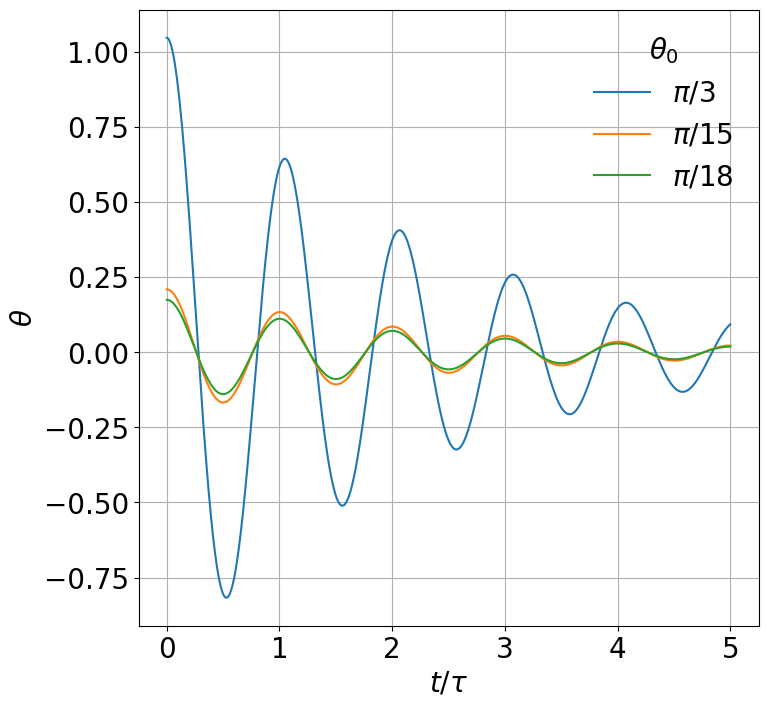

In [6]:
# code for Figure 5
plt.rcParams.update({'font.size': 20})

# setting up parameters
g = 9.8 # gravitational force(m/s^2)
l = 0.5 # length of the rod(m)
k = 32 # the drag force constant k(dimensionless)
r = 0.025 # the radius of the sphere (m)
A = np.pi * (r * r) # the projected area (m^2)
m = 0.1 # the mass of the sphere (kg)
gamma = (k * A) / m # (m^2/kg)
beta = g / l
T = 2 * np.pi / np.sqrt(beta - (gamma ** 2)/4) # the oscillation period(s)
dt = 0.00001 #a really small delta delta t/tau
tf = 5 * T # simulation duration(s)
theta0_arr = np.array([np.pi/3, np.pi/15, np.pi/18]) # different initial angles
y0 = 0 # the intial dtheta/dt(/s)

# set up the figure and x,y labels
plt.figure(figsize=(8,8))
plt.ylabel(r"$\theta$")
plt.xlabel(r"$t/\tau$")
lines = [];

# for different initial angles, run the euler method
for j in range(len(theta0_arr)):
  tM = int(np.floor(tf/(dt * T))+1)
  t = np.linspace(0, tf, tM)
  dt = t[1]-t[0]
  theta = np.zeros(tM)
  y = np.zeros(tM)
  theta[0] = theta0_arr[j]
  y[0] = y0

  # Euler method
  for i in range(tM-1):
    dtheta = dt * y[i]
    dy = dt * (-beta * np.sin(theta[i]) - gamma * y[i])
    y[i+1] = y[i] + dy
    theta[i+1] = theta[i] + dtheta
  
  # set up the labels in the legend
  if j == 0:
    label = "$\pi /3$"
  elif j == 1:
    label = "$\pi /15$"
  elif j == 2:
    label = "$\pi /18$"
  lines += plt.plot(t/T, theta, label=label)

# set up the legend, save the figure, and display the figure
labels = [l.get_label() for l in lines]
plt.legend(lines, labels, frameon=False, title=r"$\theta_0$")
plt.grid()
plt.savefig("figure5.png", bbox_inches = "tight")
plt.show()

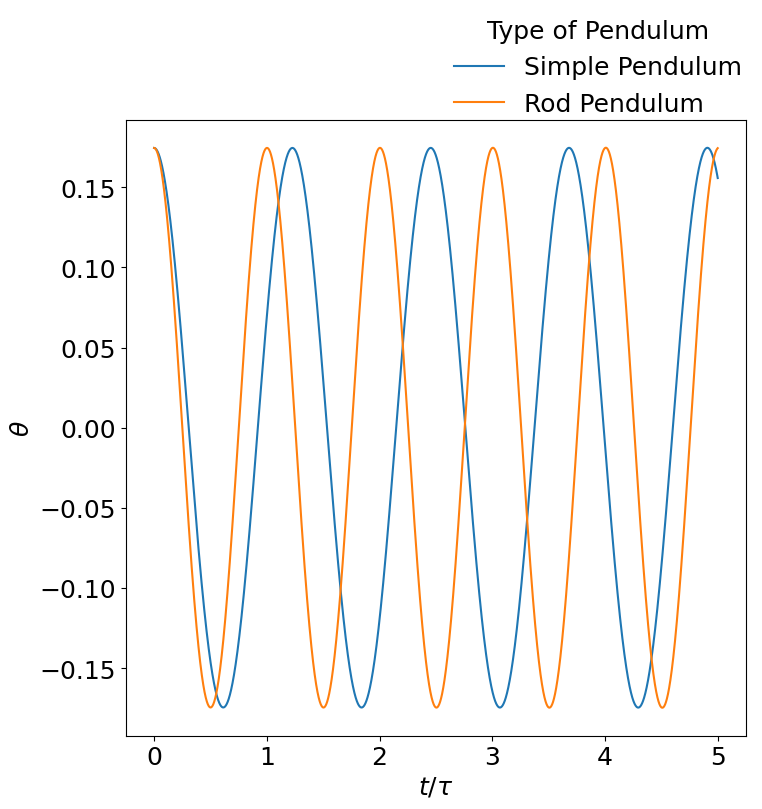

In [7]:
plt.rcParams.update({'font.size': 18})

# code for Figure 6
# setting up parameters
g = 9.8 # gravitational force(m/s^2)
l = 0.5 # length of the rod(m)
T = 2 * np.pi * np.sqrt((2 * l)/(3 *g)) # the oscillation period(s)
dt = 0.00001 #different delta t/tau
tf = 5 * T # simulation duration(s)
theta0 = np.pi/18 # the initial angle
y0 = 0 # the intial dtheta/dt(/s)

# set up the figure and x,y labels
plt.figure(figsize=(8,8))
plt.ylabel(r"$\theta$")
plt.xlabel(r"$t/\tau$")
lines = [];

# run the Euler method for simple pendulum
dt = dt * T
tM = int(np.floor(tf/dt)+1)
t = np.linspace(0, tf, tM)
dt = t[1]-t[0]
theta = np.zeros(tM)
y = np.zeros(tM)
theta[0] = theta0
y[0] = y0

# Euler method
for i in range(tM-1):
  dtheta = dt * y[i]
  dy = dt * (-(g/l)*np.sin(theta[i]))
  y[i+1] = y[i] + dy
  theta[i+1] = theta[i] + dtheta

# plot the line
lines += plt.plot(t/T, theta, label="Simple Pendulum")

# run the Euler method for rod pendulum
dt = dt * T
tM = int(np.floor(tf/dt)+1)
t = np.linspace(0, tf, tM)
dt = t[1]-t[0]
theta = np.zeros(tM)
y = np.zeros(tM)
theta[0] = theta0
y[0] = y0

# Euler method
for i in range(tM-1):
  dtheta = dt * y[i]
  dy = dt * ((-(3/2) * g/l)*np.sin(theta[i]))
  y[i+1] = y[i] + dy
  theta[i+1] = theta[i] + dtheta

# plot the line
lines += plt.plot(t/T, theta, label="Rod Pendulum")

# set up the legend, save the figure, and display the figure
labels = [l.get_label() for l in lines]
plt.legend(lines, labels, frameon=False, title="Type of Pendulum", bbox_to_anchor=(1.03, 1.2))
plt.savefig("figure6.png", bbox_inches = "tight")
plt.show()

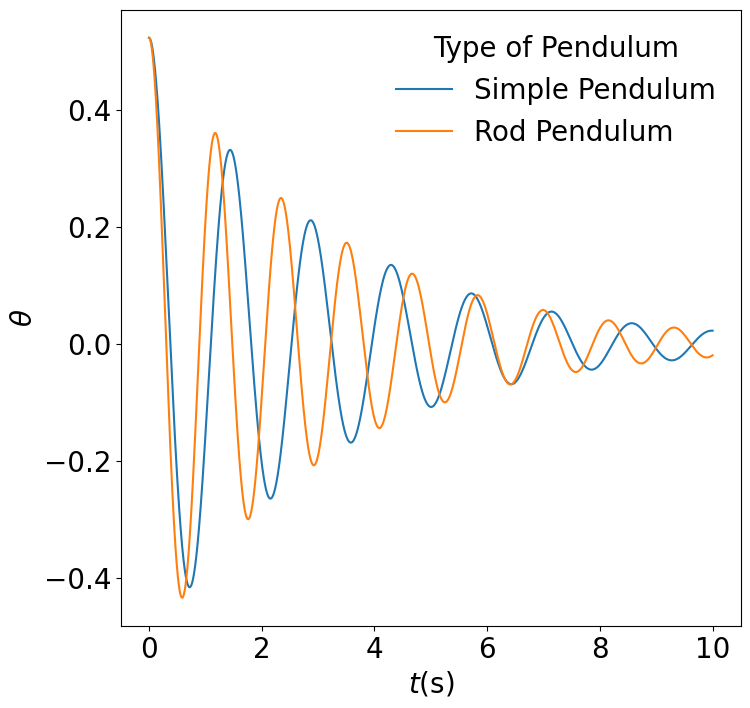

In [8]:
# code for Figure 7
plt.rcParams.update({'font.size': 20})

# setting up parameters
g = 9.8 # gravitational force(m/s^2)
l = 0.5 # length of the rod(m)
a = 0.005 # radius of the rod(m)
k = 32 # the drag force constant k(dimensionless)
r = 0.025 # the radius of the sphere (m)
A = np.pi * (r * r) # the projected area (m^2)
m = 0.1 # the mass of the sphere (kg)
gamma = (k * A) / m # (m^2/kg)
beta = g / l
sigma = (3/2) * g / l
# T = 2 * np.pi / np.sqrt(beta - (gamma ** 2)/4) # the oscillation period(s)
dt = 0.00001 #a really small delta t(s)
tf = 10 # simulation duration(s)
theta0 = np.pi/6 # different initial angles
y0 = 0 # the intial dtheta/dt(/s)

# set up the figure and x,y labels
plt.figure(figsize=(8,8))
plt.ylabel(r"$\theta$")
plt.xlabel(r"$t(\mathrm{s})$")
lines = [];

# run the Euler method for simple pendulum
tM = int(np.floor(tf/dt)+1)
t = np.linspace(0, tf, tM)
dt = t[1]-t[0]
theta = np.zeros(tM)
y = np.zeros(tM)
theta[0] = theta0
y[0] = y0

# Euler method
for i in range(tM-1):
  dtheta = dt * y[i]
  dy = dt * (-beta * np.sin(theta[i]) - gamma * y[i])
  y[i+1] = y[i] + dy
  theta[i+1] = theta[i] + dtheta

# plot the line
lines += plt.plot(t, theta, label="Simple Pendulum")

# run the Euler method for rod pendulum
tM = int(np.floor(tf/dt)+1)
t = np.linspace(0, tf, tM)
dt = t[1]-t[0]
theta = np.zeros(tM)
y = np.zeros(tM)
theta[0] = theta0
y[0] = y0

# Euler method
for i in range(tM-1):
  dtheta = dt * y[i]
  dy = dt * (-sigma * np.sin(theta[i]) - gamma * y[i])
  y[i+1] = y[i] + dy
  theta[i+1] = theta[i] + dtheta

# plot the line
lines += plt.plot(t, theta, label="Rod Pendulum")

# set up the legend, save the figure, and display the figure
labels = [l.get_label() for l in lines]
plt.legend(lines, labels, frameon=False, title="Type of Pendulum")
plt.savefig("figure7.png", bbox_inches = "tight")
plt.show()

<ipython-input-9-9c18ced517e0>:68: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig("figure8.png", bbox_inches = "tight")


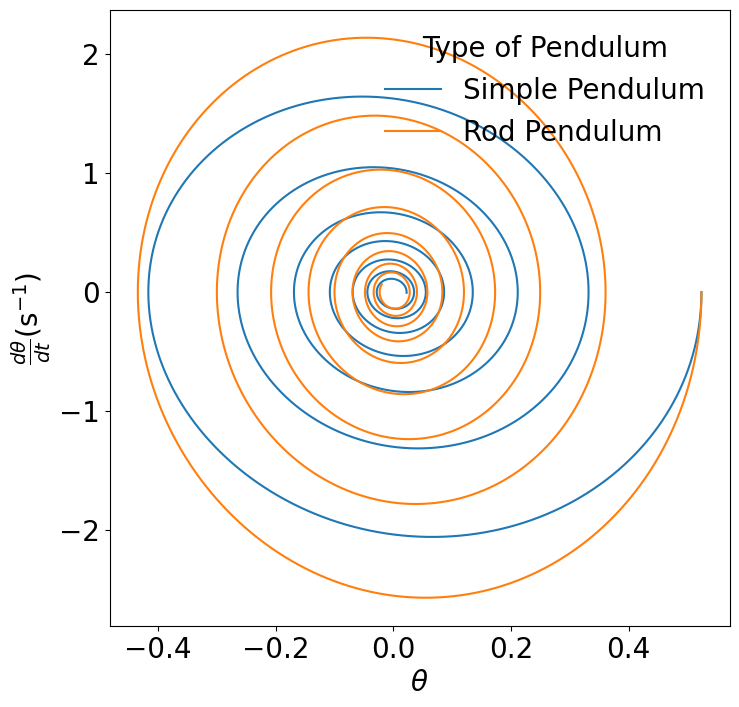

In [9]:
# code for Figure 8
plt.rcParams.update({'font.size': 20})

# setting up parameters
g = 9.8 # gravitational force(m/s^2)
l = 0.5 # length of the rod(m)
a = 0.005 # radius of the rod(m)
k = 32 # the drag force constant k(dimensionless)
r = 0.025 # the radius of the sphere (m)
A = np.pi * (r * r) # the projected area (m^2)
m = 0.1 # the mass of the sphere (kg)
gamma = (k * A) / m # (m^2/kg)
beta = g / l
sigma = (3/2) * g / l
# T = 2 * np.pi / np.sqrt(beta - (gamma ** 2)/4) # the oscillation period(s)
dt = 0.00001 #a really small delta t(s)
tf = 10 # simulation duration(s)
theta0 = np.pi/6 # different initial angles
y0 = 0 # the intial dtheta/dt(/s)

# set up the figure and x,y labels
plt.figure(figsize=(8,8))
plt.ylabel(r"$\frac{d\theta}{dt}(\mathrm{s}^{-1})$")
plt.xlabel(r"$\theta$")
lines = [];

# run the Euler method for simple pendulum 
tM = int(np.floor(tf/dt)+1)
t = np.linspace(0, tf, tM)
dt = t[1]-t[0]
theta = np.zeros(tM)
y = np.zeros(tM)
theta[0] = theta0
y[0] = y0

#Euler method
for i in range(tM-1):
  dtheta = dt * y[i]
  dy = dt * (-beta * np.sin(theta[i]) - gamma * y[i])
  y[i+1] = y[i] + dy
  theta[i+1] = theta[i] + dtheta

# plot the line
lines += plt.plot(theta, y, label="Simple Pendulum")

# run the Euler method for rod pendulum
tM = int(np.floor(tf/dt)+1)
t = np.linspace(0, tf, tM)
dt = t[1]-t[0]
theta = np.zeros(tM)
y = np.zeros(tM)
theta[0] = theta0
y[0] = y0

# Euler method
for i in range(tM-1):
  dtheta = dt * y[i]
  dy = dt * (-sigma * np.sin(theta[i]) - gamma * y[i])
  y[i+1] = y[i] + dy
  theta[i+1] = theta[i] + dtheta

# plot the line
lines += plt.plot(theta, y, label="Rod Pendulum")

# set up the legend, save the figure, and display the figure
labels = [l.get_label() for l in lines]
plt.legend(lines, labels, frameon=False, title="Type of Pendulum")
plt.savefig("figure8.png", bbox_inches = "tight")
plt.show()